In [21]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import pickle

import sys
sys.path.append('../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
fullpath = \
'/Users/vishwa/Dev/covid-modelling/main/ihme/output/new_backtesting_out/Mumbai_deaths/2020-05-21 12:26:09.154541'
picklefn = f'{fullpath}/backtesting.pkl'

with open(picklefn, 'rb') as pickle_file:
        results = pickle.load(pickle_file)

In [41]:
import matplotlib as mpl
import seaborn as sns

from utils.plotting import setup_plt
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter
import pandas as pd
from main.ihme.backtesting_hyperparams import plot_backtesting_errors, plot_backtesting_results, plot_results
from datetime import timedelta

In [31]:
def plot(x, y, title, yaxis_name=None, log=False, scatter=False):
    plt.title(title)
    setup_plt(yaxis_name)
    yscale = 'log' if log else "linear"
    plt.yscale(yscale)

    # plot error
    if scatter:
        plt.scatter(x,y,c='dodgerblue', marker='+')
    else:
        plt.plot(x, y, ls='-', c='crimson')
    return

In [70]:
start = results['df']['date'].min()

In [48]:
results['results'].keys()

dict_keys([14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44])

In [49]:
results['results'][14].keys()

dict_keys(['fe_init', 'n_days', 'seed', 'error', 'xform_error', 'predictions'])

In [71]:
dates = pd.Series(list(results['results'].keys())).apply(lambda x: results['df']['date'].min() + timedelta(days=x))

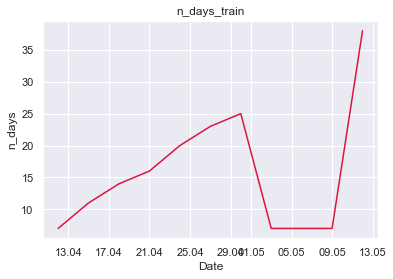

In [72]:
plot(dates, [d['n_days'] for d in results['results'].values()], 'n_days_train', 'n_days')

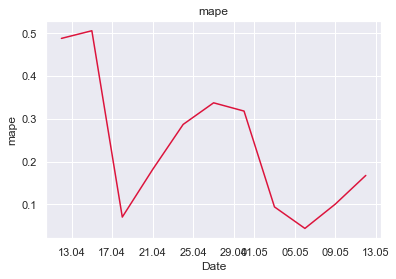

In [73]:
plot(dates, [d['xform_error']['mape'] for d in results['results'].values()], 'mape', 'mape')